In [43]:
import pandas as pd
from plotnine import *
from scipy import stats
import numpy as np

from statsmodels import stats

In [4]:
eso = pd.read_csv('Esophagus.txt',sep='\t')

In [12]:
eso.columns[16]

'Chondrocytes'

In [8]:
eso.head()

Old Name  Adipocytes  Astrocytes  B-cells  Basophils  \
0  GTEX.111CU.0726.SM.5GZYD      0.0000      0.0000   0.0139        0.0   
1  GTEX.111CU.0626.SM.5EGHL      0.0000      0.0000   0.0000        0.0   
2  GTEX.111CU.0826.SM.5EGIJ      0.0042      0.0000   0.0000        0.0   
3  GTEX.11GSP.1826.SM.5N9DQ      0.0004      0.0227   0.0000        0.0   
4  GTEX.11GSP.1726.SM.5A5LI      0.0000      0.0701   0.0000        0.0   

   CD4+ T-cells  CD4+ Tcm  CD4+ Tem  CD4+ memory T-cells  CD4+ naive T-cells  \
0           0.0    0.0000       0.0                  0.0              0.0000   
1           0.0    0.0000       0.0                  0.0              0.0109   
2           0.0    0.0167       0.0                  0.0              0.0034   
3           0.0    0.0000       0.0                  0.0              0.0000   
4           0.0    0.0000       0.0                  0.0              0.0000   

   ...  ly Endothelial cells  mv Endothelial cells  naive B-cells  pDC  \
0  ...                0.0108                0.0159         0.0001  0.0   
1  ...                0.0575                0.0631         0.0000  0.0   
2  ...                0.0395                0.0532         0.0000  0.0   
3  ...                0.0303                0.0282         0.0000  0.0   
4  ...                0.2184                0.1392         0.0000  0.0   

   pro B-cells                    Group  Sample Name  SEX    AGE  DTHHRDY  
0          0.0  Mutation in Cancer Gene   GTEX-111CU    1  50-59      0.0  
1          0.0             No Mutations   GTEX-111CU    1  50-59      0.0  
2          0.0             No Mutations   GTEX-111CU    1  50-59      0.0  
3          0.0  Mutation in Cancer Gene   GTEX-11GSP    2  60-69      2.0  
4          0.0             No Mutations   GTEX-11GSP    2  60-69      2.0  

[5 rows x 70 columns]

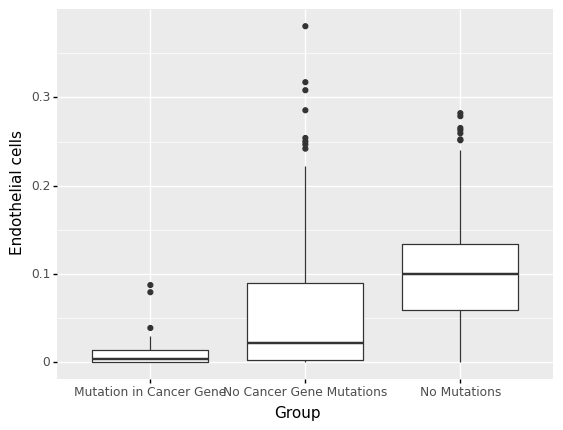

<ggplot: (8761895540944)>

In [15]:
ggplot(eso) + aes(x='Group',y=eso.columns[19]) + geom_boxplot()

In [33]:
stats.ttest_ind(g1,g2)[1]

0.01258278493049735

In [34]:
p_values = []
for cell_type in list(eso.columns[1:-5]):
    g1 = list(eso[eso['Group'] == 'Mutation in Cancer Gene'][cell_type])
    g2 = list(eso[eso['Group'] == 'No Cancer Gene Mutations'][cell_type])
    p_value = stats.ttest_ind(g1,g2)[1]
    p_values.append(p_value)

In [56]:
stats.multitest.multipletests(pvals = p_values,method='bonferroni',alpha=0.05)

(array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False]),
 array([1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 0.80529824, 1.        ,
        0.57777348, 1.        , 0.2961317 , 1.        , 1.        ,
        1.        , 0.53511705, 1.        ,        nan, 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.

In [57]:
p_values

[0.6388309604186785,
 0.5417810698254274,
 0.859592506618344,
 0.7429801556261617,
 0.6942462584072359,
 0.34843927083369897,
 0.08105552645943331,
 0.549852267566181,
 0.4648885705803212,
 0.9742599560986133,
 0.46624200231455437,
 0.6409412742528899,
 0.7634657384714301,
 0.6951091777714952,
 0.10998805909801838,
 0.19892260942615758,
 0.7138852762695775,
 0.43444634686368855,
 0.01258278493049735,
 0.6572662495685221,
 0.009027710637273624,
 0.7841738638684943,
 0.004627057876848734,
 0.7307878424952428,
 0.02681620521336708,
 0.6899827971261023,
 0.008361203836786759,
 0.200806631377513,
 nan,
 0.25476982359318595,
 0.47628985869270246,
 0.8905978938529644,
 0.030153763130909055,
 0.7218759304982975,
 0.061028188030768454,
 0.29606735825016717,
 0.8996908560201622,
 0.26956157453702834,
 0.7878989777327614,
 0.04182883991030665,
 0.7428068085416877,
 0.0109337341209551,
 0.01105408272483621,
 0.9041683592581364,
 0.005771753997724718,
 0.012987237277914421,
 0.4087013543103466,
 0.